In [1]:
%matplotlib inline
%time from hikyuu.interactive import *
from pylab import plot
import h5py
from hikyuu.indicator import *

2025-03-21 12:42:00,385 [INFO] runing in interactive session [<module>] (C:\Users\25858\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\hikyuu\__init__.py:118) [hikyuu::hku_info]
2025-03-21 12:42:00,388 [INFO] running in jupyter [<module>] (C:\Users\25858\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\hikyuu\__init__.py:125) [hikyuu::hku_info]


2025-03-21 12:42:00.411 [HKU-I] - Using SQLITE3 BaseInfoDriver (BaseInfoDriver.cpp:57)
2025-03-21 12:42:00.440 [HKU-I] - Loading market information... (StockManager.cpp:482)
2025-03-21 12:42:00.441 [HKU-I] - Loading stock type information... (StockManager.cpp:500)
2025-03-21 12:42:00.442 [HKU-I] - Loading stock information... (StockManager.cpp:402)
2025-03-21 12:42:00.547 [HKU-I] - Loading stock weight... (StockManager.cpp:518)
2025-03-21 12:42:00.826 [HKU-I] - Loading block... (StockManager.cpp:113)
2025-03-21 12:42:01.084 [HKU-I] - Loading KData... (StockManager.cpp:117)
2025-03-21 12:42:01.085 [HKU-I] - Preloading all day kdata to buffer ! (StockManager.cpp:160)
2025-03-21 12:42:01.086 [HKU-I] - 0.65s Loaded Data. (StockManager.cpp:125)
CPU times: total: 750 ms
Wall time: 12.3 s


从HDF5文件加载特定日期和周期的RPS数据
参数:
        h5_file: HDF5文件路径
        date: 日期字符串，格式为'YYYY-MM-DD'
        period: RPS周期，如10, 20, 50, 120, 250
    
返回:
        包含股票代码和RPS值的字典

In [2]:
def load_rps_data(h5_file, date, period):
    rps_dict = {}
    with h5py.File(h5_file, 'r') as f:
        if date in f:
            date_group = f[date]
            rps_key = f'RPS{period}'
            
            if rps_key in date_group:
                rps_dataset = date_group[rps_key]
                for code, rps in rps_dataset:
                    rps_dict[code] = float(rps)
    
    return rps_dict

In [3]:
# 创建一个系统策略
# my_mm = MM_FixedCount(100)
my_mm = MM_Nothing()
my_sg = my_sg = SG_Flex(EMA(CLOSE(), n=5), slow_n=10)
my_sys = SYS_Simple(sg=my_sg, mm=my_mm)

In [4]:
# 创建一个选择算法，用于在每日选定交易系统
# 此处是固定选择器，即每日选出的都是指定的交易系统
# my_se = SE_Fixed([s for s in blocka if s.valid], my_sys)
my_se = SE_Fixed([s for s in sm.get_block("指数板块", "沪深300")], my_sys)
# mf = MF_Weight([KDJ], [1], blocka, Query(-1))
# my_se = SE_MultiFactor(mf, topn=10)

In [5]:
# 创建一个资产分配器，用于确定如何在选定的交易系统中进行资产分配
# 此处创建的是一个等比例分配资产的分配器，即按相同比例在选出的系统中进行资金分配
my_af = AF_EqualWeight()

In [6]:
# 创建资产组合
# 创建一个从2001年1月1日开始的账户，初始资金200万元。这里由于使用的等比例分配器，意味着将账户剩余资金在所有选中的系统中平均分配，
# 如果初始资金过小，将导致每个系统都没有充足的资金完成交易。
my_tm = crtTM(Datetime(202401010000), 2000000)
my_pf = PF_Simple(tm=my_tm, af=my_af, se=my_se)

In [7]:
# 运行投资组合
q = Query(Datetime(202401010000))
%time my_pf.run(Query(Datetime(202401010000)), 10)

CPU times: total: 5.31 s
Wall time: 11.2 s


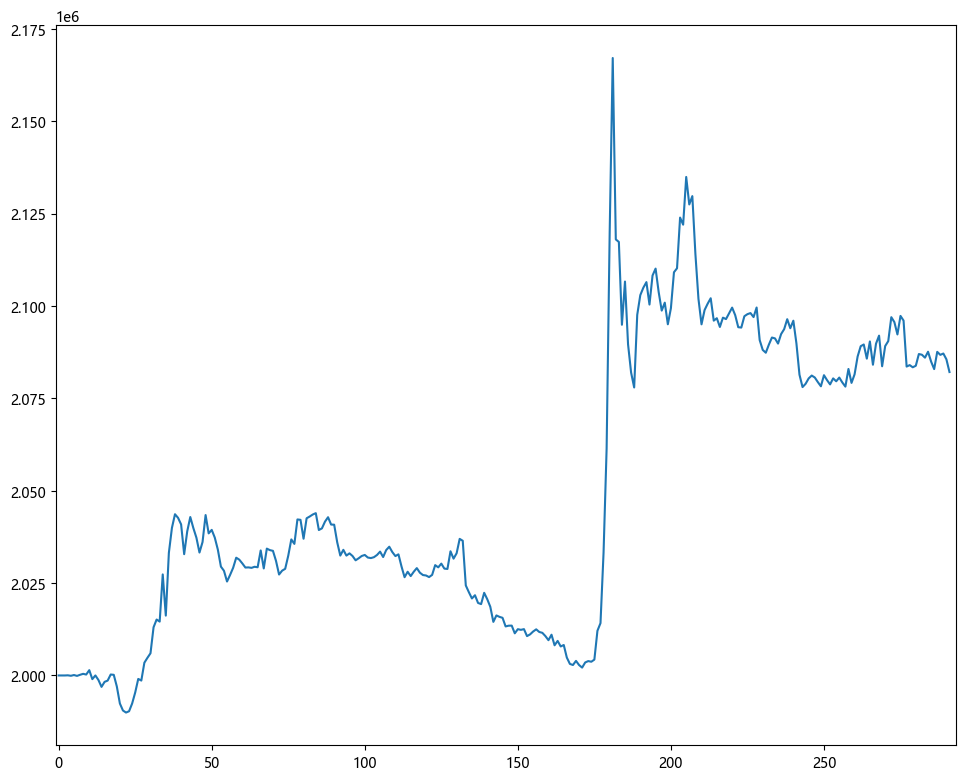

In [8]:
x = my_tm.get_funds_curve(sm.get_trading_calendar(q))
PRICELIST(x).plot()

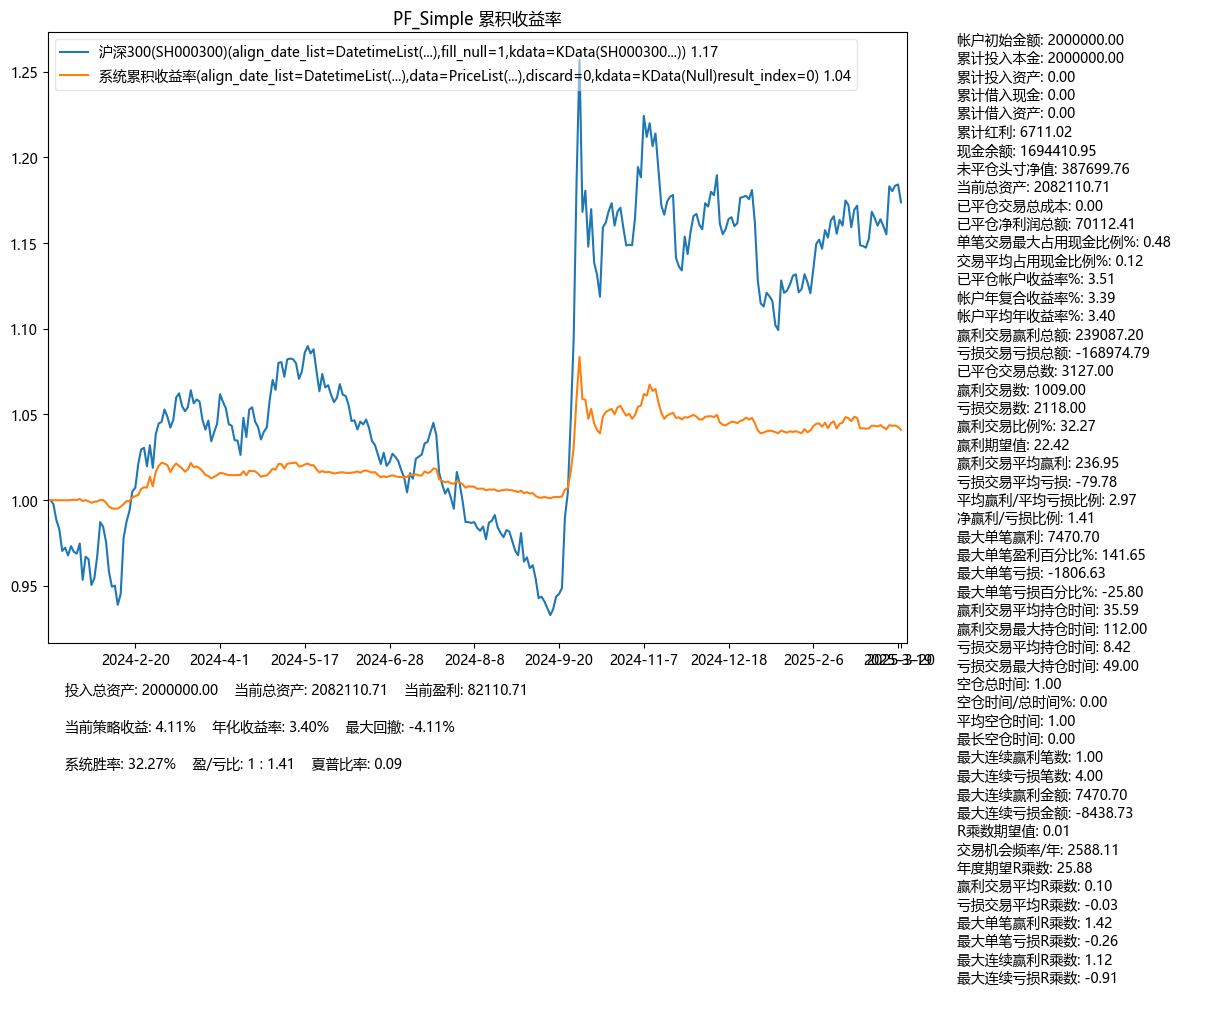

In [9]:
my_pf.performance()

In [10]:
my_tm

TradeManager {
  params: params[precision(int): 2, save_action(bool): 1, support_borrow_cash(bool): 0, support_borrow_stock(bool): 0, ],
  name: SYS,
  init_date: 2024-01-01 00:00:00,
  init_cash: 2000000.00,
  firstDatetime: 2024-01-05 00:00:00,
  lastDatetime: 2025-03-20 00:00:00,
  TradeCostFunc: TradeCostFunc(TC_Zero, params[]),
  current total funds: 2082110.71,
  current cash: 1694410.95,
  current market_value: 387699.76,
  current short_market_value: 0.00,
  current base_cash: 2000000.00,
  current base_asset: 0.00,
  current borrow_cash: 0.00,
  current borrow_asset: 0.00,
  Position: 
    SH600023 浙能电力 2025-03-14 00:00:00 5 100.00 554.00 561.00 7.00 1.26% 0.00%
    SH600018 上港集团 2025-03-19 00:00:00 2 100.00 562.00 560.00 -2.00 -0.36% -0.00%
    SH600009 上海机场 2025-03-18 00:00:00 3 100.00 3271.00 3247.90 -23.10 -0.71% -0.00%
    SH600015 华夏银行 2025-03-17 00:00:00 4 100.00 759.00 765.00 6.00 0.79% 0.00%
    SH600019 宝钢股份 2025-02-27 00:00:00 16 100.00 699.00 738.00 39.00 5.58% 0.0